Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


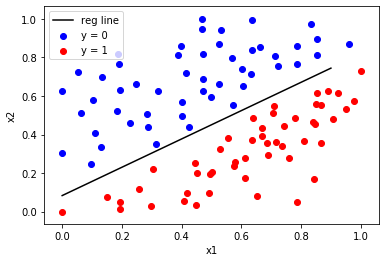

In [119]:
# example credits - geeksforgeeks
import csv 
import numpy as np 
import matplotlib.pyplot as plt 


def loadCSV(filename): 
	''' 
	function to load dataset 
	'''
	with open(filename,"r") as csvfile: 
		lines = csv.reader(csvfile) 
		dataset = list(lines) 
		for i in range(len(dataset)): 
			dataset[i] = [float(x) for x in dataset[i]]	 
	return np.array(dataset) 


def normalize(X): 
	''' 
	function to normalize feature matrix, X 
	'''
	mins = np.min(X, axis = 0) 
	maxs = np.max(X, axis = 0) 
	rng = maxs - mins 
	norm_X = 1 - ((maxs - X)/rng) 
	return norm_X 


def logistic_func(beta, X): 
	''' 
	logistic(sigmoid) function 
	'''
	return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 


def log_gradient(beta, X, y): 
	''' 
	logistic gradient function 
	'''
	first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
	final_calc = np.dot(first_calc.T, X) 
	return final_calc 


def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 


def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1

    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1

    return beta, num_iter 


def pred_values(beta, X): 
	''' 
	function to predict labels 
	'''
	pred_prob = logistic_func(beta, X) 
	pred_value = np.where(pred_prob >= .5, 1, 0) 
	return np.squeeze(pred_value) 


def plot_reg(X, y, beta): 
	''' 
	function to plot decision boundary 
	'''
	# labelled observations 
	x_0 = X[np.where(y == 0.0)] 
	x_1 = X[np.where(y == 1.0)] 
	
	# plotting points with diff color for diff label 
	plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
	plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
	
	# plotting decision boundary 
	x1 = np.arange(0, 1, 0.1) 
	x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
	plt.plot(x1, x2, c='k', label='reg line') 

	plt.xlabel('x1') 
	plt.ylabel('x2') 
	plt.legend() 
	plt.show() 
	

	
if __name__ == "__main__": 
	# load the dataset 
	dataset = loadCSV('./resources/user_data.csv') 
	
	# normalizing feature matrix 
	X = normalize(dataset[:, :-1]) 
	# stacking columns wth all ones in feature matrix 
	X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
	# response vector 
	y = dataset[:, -1] 

	# initial beta values 
	beta = np.matrix(np.zeros(X.shape[1])) 

	# beta values after running gradient descent 
	beta, num_iter = grad_desc(X, y, beta) 

	# estimated beta values and number of iterations 
	print("Estimated regression coefficients:", beta) 
	print("No. of iterations:", num_iter) 

	# predicted labels 
	y_pred = pred_values(beta, X) 
	
	# number of correctly predicted labels 
	print("Correctly predicted labels:", np.sum(y == y_pred)) 
	
	# plotting regression line 
	plot_reg(X, y, beta) 


In [128]:
# example credits - python engineer
import numpy as np

class CustomLogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

clr = CustomLogisticRegression(learning_rate=0.001, n_iters=1000)
dataset = loadCSV('./resources/insurance_data.csv') 
X = dataset[:, :-1] 
y = dataset[:, -1] 
clr.fit(X, y)
new_x_1 = np.array([[37,1]])
new_x_2 = np.array([[65,1]])
new_x_3 = np.array([[63,0]])
new_x_4 = np.array([[12,0]])
new_x_5 = np.array([[27,0]])

print(clr.weights)
print(clr.bias)
print(clr.predict(new_x_1))
print(clr.predict(new_x_2))
print(clr.predict(new_x_3))
print(clr.predict(new_x_4))
print(clr.predict(new_x_5))


[0.00887965 0.02078964]
-0.1754842945713734
[1]
[1]
[1]
[0]
[1]
